# Glx in CGs  (462 cg)

In [46]:
L<-read.table("../data/compact_in_gg_m3_full")
N<-read.table("../data/compact_in_node_m3_full")
NE<-read.table("../data/compact_in_field_m3_full")
F<-read.table("../data/compact_in_filaments_m3_full")
V<-read.table("../data/compact_in_voids_m3_full")
T<-read.table("../data/compact_in_all")

gal_all<-read.table("../../catalogos/tab_gal_gru_full2.dat")

colnames(L)[c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)] <- c('igru','nmi','alcm','delcm','zmedian','radio_mins','mu','sigv','rmag_bri','flag','rabs1','dij','tcr','rp','rabs2')
                                                                                                                                                                          
colnames(N)[c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)] <- c("igru",'nmi','alcm','delcm','zmedian','radio_mins','mu','sigv','rmag_bri','flag','rabs1','dij','tcr','rp','rabs2')
                                                                                                                                                                          
colnames(NE)[c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)] <-  c("igru",'nmi','alcm','delcm','zmedian','radio_mins','mu','sigv','rmag_bri','flag','rabs1','dij','tcr','rp','rabs2')
                                                                                                                                                                          
colnames(F)[c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)] <- c("igru",'nmi','alcm','delcm','zmedian','radio_mins','mu','sigv','rmag_bri','flag','rabs1','dij','tcr','rp','rabs2')
                                                                                                                                                                          
colnames(V)[c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)] <- c("igru",'nmi','alcm','delcm','zmedian','radio_mins','mu','sigv','rmag_bri','flag','rabs1','dij','tcr','rp','rabs2','tipo','estado')

colnames(gal_all)[c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)] <-c("GId", "Nm", "RA", "Dec", "Redshift", "mag_r", "mag_g", "mag_g", "galid", "r50", "r90", "rabs", "gabs", "uabs", "passive", "early", "cparam")

colnames(T)[c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16)] <- c('igru','nmi','alcm','delcm','zmedian','radio_mins','mu','sigv','rmag_bri','flag','rabs1','dij','tcr','rp','rabs2','entorno')

In [47]:
head(T,2)

igru,nmi,alcm,delcm,zmedian,radio_mins,mu,sigv,rmag_bri,flag,rabs1,dij,tcr,rp,rabs2,entorno
2,4,"116,577","22,020","0,046817","4,090","25,289","274,092","14,289",0,"-21,512","0,0923132","0,0305440","82,54371","-20,895",Loose
4,5,"117,794","50,217","0,021810","5,095","23,789","409,803","12,839",0,"-21,235","0,0555815","0,0123003","48,17682","-21,207",Loose


# Glx in CG in Volume-limited sample (449 cg)

In [67]:
igru_v1 = T$igru
length(igru_v1)
length(gal_all$GId)

for (i in 1:length(gal_all$GId)){
for (j in 1:length(igru_v1)){
    #if(gal_all$GId==igru_v1[j]){print(i)}
    gal = subset(gal_all, gal_all$GId[i] ==  T$igru[j])
}}


[1] 449

[1] 2070

In [ ]:
gal

In [25]:
col_ur = gal$uabs - gal$rabs
c_index = gal$cparam

In [36]:
col_ur_red = subset(col_ur, gal$passive==1)
c_index_red = subset(c_index, gal$passive==1)
col_ur_blue = subset(col_ur, gal$passive==0)
c_index_blue = subset(c_index, gal$passive==0)

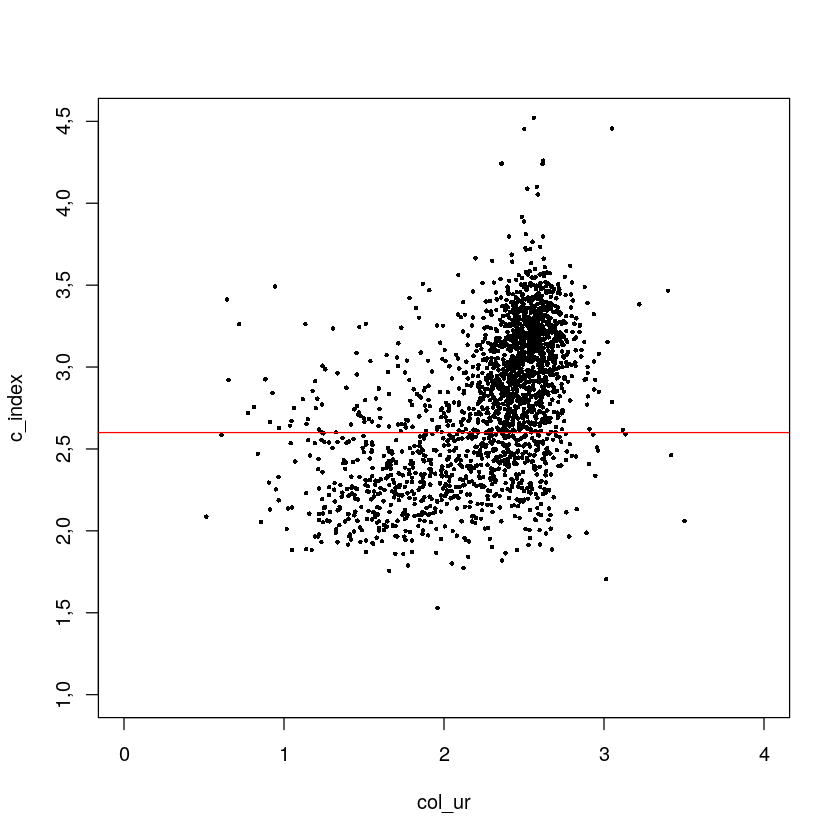

In [37]:
plot(col_ur, c_index, xlim=c(0,4), ylim=c(1,4.5), pch=16, cex=0.5
    )
abline(h=2.6, col='red')

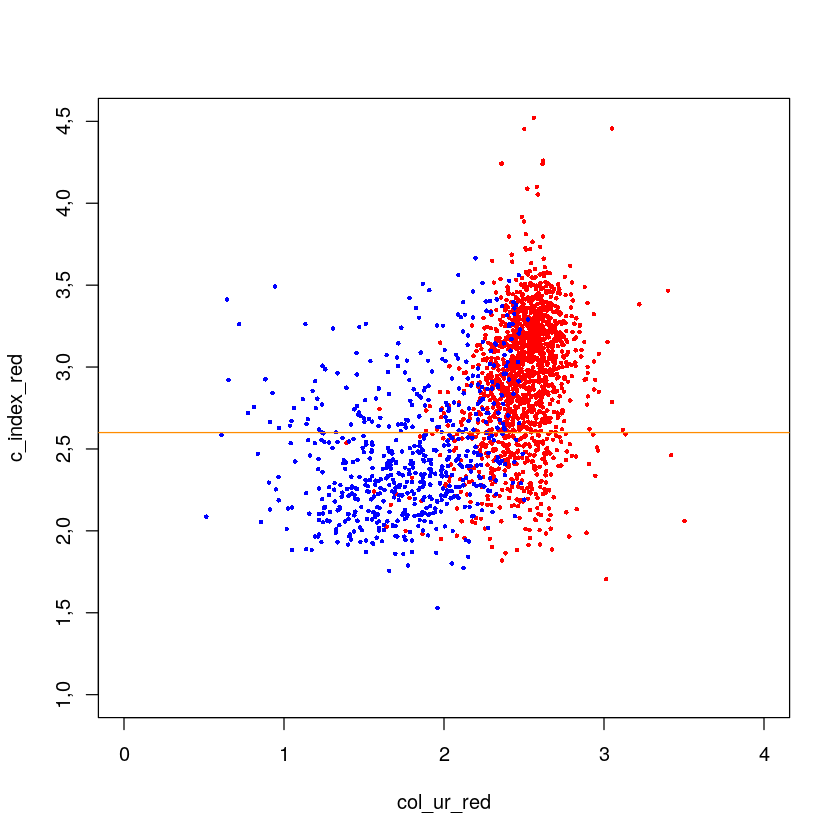

In [43]:
plot(col_ur_red, c_index_red, xlim=c(0,4), ylim=c(1,4.5), pch=16, cex=0.5, col='red')
points(col_ur_blue, c_index_blue, pch=16, cex=0.5, col='blue')
abline(h=2.6, col='darkorange')

# Gal in CG red

In [27]:
df_red = subset(gal, gal$passive==1)
head(df_red,2)

,GId,Nm,RA,Dec,Redshift,mag_r,mag_g,mag_g.1,galid,r50,r90,rabs,gabs,uabs,passive,early,cparam
1,1,1,"114,844","45,118","0,079785","14,719","15,661","18,910","1,237664e+18","6,580098","20,917290","-22,38191","-21,56168","-19,65829",1,1,"3,17887"
3,1,3,"114,850","45,082","0,078914","16,813","17,693","19,805","1,237664e+18","1,159409","3,226531","-20,25581","-19,49058","-17,69719",1,1,"3,28627"


In [30]:
N_red = length(df_red$galid)
N_red

[1] 1459

# Gal in CG early-type

In [31]:
df_early = subset(gal, gal$early==1)
head(df_early,2)

,GId,Nm,RA,Dec,Redshift,mag_r,mag_g,mag_g.1,galid,r50,r90,rabs,gabs,uabs,passive,early,cparam
1,1,1,"114,844","45,118","0,079785","14,719","15,661","18,910","1,237664e+18","6,580098","20,917290","-22,38191","-21,56168","-19,65829",1,1,"3,17887"
3,1,3,"114,850","45,082","0,078914","16,813","17,693","19,805","1,237664e+18","1,159409","3,226531","-20,25581","-19,49058","-17,69719",1,1,"3,28627"


In [33]:
N_early = length(df_early$galid)
N_early

[1] 1354